# IT Market trends

## Project definition

For this project, I was interestested in using Stack Overflow survey data from 2017 to 2020 to better understand:

### 1. Can we predict the job satisfaction?
### 2. What factors are most important to job satisfaction?
### 3. Tendencies and trends on IT developing market, most popular languages and platforms?

In [26]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

In [27]:
pd.set_option('display.max_colwidth', None)

### Data exploration and data analysis

Remark: all files with the initial data you can find here:
https://insights.stackoverflow.com/survey
I used local copies of all files.

#### Read and explore the survey data from 2017 till 2020

In [28]:
# read the data 2017
df = pd.read_csv("C:\\Users\\qxz2f4p\\Documents\\git_dir\\Data_source\\2017_survey_results_public.csv")
print(df.shape)
df.head()

(51392, 154)


,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning a bachelor's degree,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day each week","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes writes code,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day each week","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
df.columns

Index(['Respondent', 'Professional', 'ProgramHobby', 'Country', 'University',
       'EmploymentStatus', 'FormalEducation', 'MajorUndergrad', 'HomeRemote',
       'CompanySize',
       ...
       'StackOverflowMakeMoney', 'Gender', 'HighestEducationParents', 'Race',
       'SurveyLong', 'QuestionsInteresting', 'QuestionsConfusing',
       'InterestedAnswers', 'Salary', 'ExpectedSalary'],
      dtype='object', length=154)

In [30]:
# read the data 2018
df1 = pd.read_csv("C:\\Users\\qxz2f4p\\Documents\\git_dir\\Data_source\\2018_survey_results_public.csv")
print(df1.shape)
df1.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(98855, 129)


,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,...,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, physics)","10,000 or more employees",Database administrator;DevOps specialist;Full-stack developer;System administrator,...,Daily or almost every day,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
2,4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or software engineering",20 to 99 employees,Engineering manager;Full-stack developer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,No,No,United States,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or software engineering",100 to 499 employees,Full-stack developer,...,I don't typically exercise,Male,Straight or heterosexual,Some college/university study without earning a degree,White or of European descent,35 - 44 years old,No,No,The survey was an appropriate length,Somewhat easy
4,7,Yes,No,South Africa,"Yes, part-time",Employed full-time,Some college/university study without earning a degree,"Computer science, computer engineering, or software engineering","10,000 or more employees",Data or business analyst;Desktop or enterprise applications developer;Game or graphics developer;QA or test developer;Student,...,3 - 4 times per week,Male,Straight or heterosexual,Some college/university study without earning a degree,White or of European descent,18 - 24 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy


In [31]:
# read the data 2019
df2 = pd.read_csv("C:\\Users\\qxz2f4p\\Documents\\git_dir\\Data_source\\2019_survey_results_public.csv")
print(df2.shape)
df2.head()

(88883, 85)


,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software is about the same,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Industry news about technologies you're interested in;Courses on technologies you're interested in,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software is about the same,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Industry news about technologies you're interested in;Tech meetups or events in your area;Courses on technologies you're interested in,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write code sometimes as part of my work",Yes,Never,The quality of OSS and closed source software is about the same,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on technologies you're interested in,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software is about the same,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or software engineering",...,Just as welcome now as I felt last year,Tech articles written by other developers;Industry news about technologies you're interested in;Tech meetups or events in your area;Courses on technologies you're interested in,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than proprietary / closed source software",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or software engineering",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on technologies you're interested in,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


In [32]:
# read the data 2020
df3 = pd.read_csv("C:\\Users\\qxz2f4p\\Documents\\git_dir\\Data_source\\2020_survey_results_public.csv")
print(df3.shape)
df3.head()

(64461, 61)


,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or software engineering",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or software engineering",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or software engineering",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no longer am",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or software engineering",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


#### Define which datasets are comparable

In [33]:
# define how many same questions have datasets
def intersection(lst1, lst2):
    return list(set(lst1) & set(lst2))
a = intersection(df.columns, df1.columns)
print(a, len(a))
b = intersection(df3.columns, df2.columns)
print(b, len(b))
c = intersection(a, b)
print(c, len(c))

['IDE', 'CareerSatisfaction', 'VersionControl', 'FormalEducation', 'Currency', 'JobSatisfaction', 'Gender', 'Country', 'SelfTaughtTypes', 'Respondent', 'Salary', 'TimeAfterBootcamp', 'EducationTypes', 'CheckInCode', 'CompanySize', 'LastNewJob', 'Methodology'] 17
['Sexuality', 'Ethnicity', 'WorkWeekHrs', 'PurchaseWhat', 'LanguageDesireNextYear', 'Country', 'UndergradMajor', 'SurveyEase', 'DatabaseWorkedWith', 'SOVisitFreq', 'WelcomeChange', 'SOPartFreq', 'MiscTechDesireNextYear', 'CompTotal', 'SOAccount', 'Hobbyist', 'Employment', 'Trans', 'PlatformWorkedWith', 'Respondent', 'EdLevel', 'ConvertedComp', 'JobFactors', 'DevType', 'JobSeek', 'SurveyLength', 'YearsCode', 'JobSat', 'MainBranch', 'MiscTechWorkedWith', 'CurrencyDesc', 'SOComm', 'OpSys', 'Age1stCode', 'PlatformDesireNextYear', 'CurrencySymbol', 'DatabaseDesireNextYear', 'Age', 'Gender', 'OrgSize', 'LanguageWorkedWith', 'YearsCodePro', 'CompFreq'] 43
['Respondent', 'Gender', 'Country'] 3


We can see that data from 2019 and 2020 have 43 intersections, that means, we can compare this data to answer our questions.

#### Clean data
Find and drop columns with a lot of nulls (more than 50%)

In [34]:
# function for drop nulls from bad populated columns
def drop_nulls(df):
    '''
    function for drop nulls from bad populated columns (at least 50% nulls)
    INPUT:
    df - dataframe
    
    OUTPUT:
    cleaned dataframe
    '''
    attr = df.columns
    for col in attr:
        if df[col].isna().sum()/df.shape[0] >= 0.50:
            df = df.drop(columns=[col])
    return df

In [35]:
# drop nulls
df2 = drop_nulls(df2)
df2.shape

(88883, 85)

In [36]:
# drop nulls
df3 = drop_nulls(df3)
df3.shape

(64461, 61)

In [37]:
# select only intersection of dataframes
df_19 = df2[b]
df_20 = df3[b]
print(df_19.shape)
print(df_20.shape)

(88883, 43)
(64461, 43)


In [38]:
# analysis of numerical columns
df_19.describe()

,WorkWeekHrs,CompTotal,Respondent,ConvertedComp,Age
count,64503.000000,5.594500e+04,88883.000000,5.582300e+04,79210.000000
mean,42.127197,5.519014e+11,44442.000000,1.271107e+05,30.336699
std,37.287610,7.331926e+13,25658.456325,2.841523e+05,9.178390
min,1.000000,0.000000e+00,1.000000,0.000000e+00,1.000000
25%,40.000000,2.000000e+04,22221.500000,2.577750e+04,24.000000
50%,40.000000,6.200000e+04,44442.000000,5.728700e+04,29.000000
75%,44.750000,1.200000e+05,66662.500000,1.000000e+05,35.000000
max,4850.000000,1.000000e+16,88883.000000,2.000000e+06,99.000000


In [39]:
# analysis of numerical columns
df_20.describe()

,WorkWeekHrs,CompTotal,Respondent,ConvertedComp,Age
count,41151.000000,3.482600e+04,64461.000000,3.475600e+04,45446.000000
mean,40.782174,3.190464e+242,32554.079738,1.037561e+05,30.834111
std,17.816383,inf,18967.442360,2.268853e+05,9.585392
min,1.000000,0.000000e+00,1.000000,0.000000e+00,1.000000
25%,40.000000,2.000000e+04,16116.000000,2.464800e+04,24.000000
50%,40.000000,6.300000e+04,32231.000000,5.404900e+04,29.000000
75%,44.000000,1.250000e+05,49142.000000,9.500000e+04,35.000000
max,475.000000,1.111111e+247,65639.000000,2.000000e+06,279.000000


We have 168 hour in a week, so select only the data with not more than 100 working hours a week.

In [40]:
# count rows data with more than 100 working hours per week
print(df_19['WorkWeekHrs'].loc[df_19['WorkWeekHrs']>100].count())
print(df_20['WorkWeekHrs'].loc[df_20['WorkWeekHrs']>100].count())

519
185


In [41]:
# select only data with less than 100 working hours per week
df_19 = df_19.drop(df_19[df_19['WorkWeekHrs']>100].index)
df_20 = df_20.drop(df_20[df_20['WorkWeekHrs']>100].index)

In [42]:
# count nulls for potential needed columns
print('2019_USD_salary filled', df_19['ConvertedComp'].isna().sum())
print('2020_USD_salary filled', df_20['ConvertedComp'].isna().sum())
print('2019_salary filled', df_19['CompTotal'].isna().sum())
print('2020_salary filled', df_20['CompTotal'].isna().sum())
print('2019_Working hours filled', df_19['WorkWeekHrs'].isna().sum())
print('2020_Working hours filled', df_20['WorkWeekHrs'].isna().sum())

2019_USD_salary filled 32984
2020_USD_salary filled 29676
2019_salary filled 32862
2020_salary filled 29607
2019_Working hours filled 24380
2020_Working hours filled 23310


In [43]:
# explore the numerical data
df_20.describe()

,WorkWeekHrs,CompTotal,Respondent,ConvertedComp,Age
count,40966.000000,3.466900e+04,64276.000000,3.460000e+04,45299.000000
mean,39.945497,3.204912e+242,32553.563445,1.037862e+05,30.831939
std,10.324478,inf,18971.028817,2.267737e+05,9.581971
min,1.000000,0.000000e+00,1.000000,0.000000e+00,1.000000
25%,40.000000,2.000000e+04,16112.750000,2.467800e+04,24.000000
50%,40.000000,6.300000e+04,32232.500000,5.404900e+04,29.000000
75%,43.000000,1.250000e+05,49149.250000,9.500000e+04,35.000000
max,100.000000,1.111111e+247,65639.000000,2.000000e+06,279.000000


Columns 'YearsCode' and 'YearsCodePro' are not numerical because of two values. Convert 'YearsCode' and 'YearsCodePro' into numeric, replace nulls with average value.

In [44]:
df_19['YearsCode'].unique()

array(['4', nan, '3', '16', '13', '6', '8', '12', '2', '5', '17', '10',
       '14', '35', '7', 'Less than 1 year', '30', '9', '26', '40', '19',
       '15', '20', '28', '25', '1', '22', '11', '33', '50', '41', '18',
       '34', '24', '23', '42', '27', '21', '36', '32', '39', '38', '31',
       '37', 'More than 50 years', '29', '44', '45', '48', '46', '43',
       '47', '49'], dtype=object)

In [45]:
df_19.loc[(df_19['YearsCode']=='Less than 1 year'), 'YearsCode'] = 0
df_20.loc[(df_20['YearsCode']=='Less than 1 year'), 'YearsCode'] = 0
df_19.loc[(df_19['YearsCode']=='More than 50 years'), 'YearsCode'] = 50
df_20.loc[(df_20['YearsCode']=='More than 50 years'), 'YearsCode'] = 50
df_19['YearsCode'] = df_19['YearsCode'].astype(float)
df_20['YearsCode'] = df_20['YearsCode'].astype(float)
df_19.loc[(df_19['YearsCode'].isna()), 'YearsCode'] = df_19['YearsCode'].mean()
df_20.loc[(df_20['YearsCode'].isna()), 'YearsCode'] = df_20['YearsCode'].mean()

In [46]:
df_19.loc[(df_19['YearsCodePro']=='Less than 1 year'), 'YearsCodePro'] = 0
df_20.loc[(df_20['YearsCodePro']=='Less than 1 year'), 'YearsCodePro'] = 0
df_19.loc[(df_19['YearsCodePro']=='More than 50 years'), 'YearsCodePro'] = 50
df_20.loc[(df_20['YearsCodePro']=='More than 50 years'), 'YearsCodePro'] = 50
df_19['YearsCodePro'] = df_19['YearsCodePro'].astype(float)
df_20['YearsCodePro'] = df_20['YearsCodePro'].astype(float)
df_19.loc[(df_19['YearsCodePro'].isna()), 'YearsCodePro'] = df_19['YearsCodePro'].mean()
df_20.loc[(df_20['YearsCodePro'].isna()), 'YearsCodePro'] = df_20['YearsCodePro'].mean()

In [47]:
list_cols = df_19.columns.to_list()
num_cols = ['Respondent', 'WorkWeekHrs', 'ConvertedComp', 'Age', 'CompTotal', 'YearsCodePro', 'YearsCode']
cat_cols = set(list_cols).difference(set(num_cols))

In [48]:
df_19_schema = pd.read_csv("C:\\Users\\qxz2f4p\\Documents\\git_dir\\Data_source\\2019_survey_results_schema.csv")
df_19_schema.head()

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order of survey response time)
1,MainBranch,"Which of the following options best describes you today? Here, by ""developer"" we mean ""someone who writes code."""
2,Hobbyist,Do you code as a hobby?
3,OpenSourcer,How often do you contribute to open source?
4,OpenSource,How do you feel about the quality of open source software (OSS)?


For better understanding of categorical columns make a function df_vals to see the data of these columns

In [49]:
def df_vals(df, cat_cols, df_schema):
    '''
    Print the values of provided columns of dataframe
    INPUT:
    df - dataframe,
    cat_cols - columns to observe,
    df_schema - schema of dataframe
    OUTPUT:
    statistics of cat_cols
    '''
    for col in cat_cols:
        print(df_schema.loc[df_schema['Column'] == col])
        print(df[col].value_counts())
        print("{:.0f}".format((1 - df[col].isna().sum()/df.shape[0])*100), '%')
        print(" ")
        print(" ")

In [50]:
df_vals(df_19, cat_cols, df_19_schema)

       Column  \
80  Sexuality   

                                                                                                                                          QuestionText  
80  Which of the following do you currently identify as? Please select all that apply. If you prefer not to answer, you may leave this question blank.  
Straight / Heterosexual                            69731
Bisexual                                            3416
Gay or Lesbian                                      1792
Bisexual;Straight / Heterosexual                     490
Bisexual;Gay or Lesbian                              114
Bisexual;Gay or Lesbian;Straight / Heterosexual      106
Gay or Lesbian;Straight / Heterosexual                38
Name: Sexuality, dtype: int64
86 %
 
 
       Column  \
81  Ethnicity   

                                                                                                                               QuestionText  
81  Which of the following do you identify a

Name: SOVisitFreq, dtype: int64
99 %
 
 
           Column  \
75  WelcomeChange   

                                                         QuestionText  
75  Compared to last year, how welcome do you feel on Stack Overflow?  
Just as welcome now as I felt last year                    62290
Somewhat more welcome now than last year                    8803
A lot more welcome now than last year                       4790
Somewhat less welcome now than last year                    4228
Not applicable - I did not use Stack Overflow last year     2664
A lot less welcome now than last year                       2575
Name: WelcomeChange, dtype: int64
97 %
 
 
        Column  \
71  SOPartFreq   

                                                                                                                                     QuestionText  
71  How frequently would you say you participate in Q&A on Stack Overflow? By participate we mean ask, answer, vote for, or comment on questions.  
Less t

I’m not actively looking, but I am open to new opportunities    46953
I am not interested in new job opportunities                    20937
I am actively looking for a job                                 12146
Name: JobSeek, dtype: int64
91 %
 
 
          Column                                               QuestionText
83  SurveyLength  How do you feel about the length of the survey this year?
Appropriate in length    57535
Too long                 27149
Too short                 1789
Name: SurveyLength, dtype: int64
98 %
 
 
    Column  \
17  JobSat   

                                                                                                                 QuestionText  
17  How satisfied are you with your current job? (If you work multiple jobs, answer for the one you spend the most hours on.)  
Slightly satisfied                    24040
Very satisfied                        22285
Slightly dissatisfied                 10679
Neither satisfied nor dissatisfied     8647
Very 

81 %
 
 
                Column  \
43  LanguageWorkedWith   

                                                                                                                                                                                                                                                                                            QuestionText  
43  Which of the following programming, scripting, and markup languages have you done extensive development work in over the past year, and which do you want to work in over the next year?  (If you both worked with the language and want to continue to do so, please check both boxes in that row.)  
HTML/CSS;JavaScript;PHP;SQL                                                         1471
C#;HTML/CSS;JavaScript;SQL                                                          1406
HTML/CSS;JavaScript                                                                 1242
C#;HTML/CSS;JavaScript;SQL;TypeScript                                    

## Methodology


### Feature engineering and machine learning algorithms to predict job satisfaction for IT worker

Make a data preprocessing and data processing (Machine learning algorithms) for predicting of job satisfaction (multiclass classification)

#### Data preprocessing

In [51]:
# columns of features for job satisfaction predicting 
jb_stf_cols = ['Employment', 'OrgSize', 'DevType', 'JobSat', 'JobFactors', 'WorkWeekHrs', 'YearsCode', 'YearsCodePro']
stf_19 = df_19[jb_stf_cols]
stf_20 = df_20[jb_stf_cols]

In [52]:
# clean the data
stf_19 = stf_19.dropna(subset = ['WorkWeekHrs'])
stf_20 = stf_20.dropna(subset = ['WorkWeekHrs'])
print(stf_19.shape)
print(stf_20.shape)

(63984, 8)
(40966, 8)


In [53]:
hr_week = 84
stf_19.drop(stf_19['WorkWeekHrs'].loc[stf_19['WorkWeekHrs'] > hr_week].index, inplace=True)
stf_20.drop(stf_20['WorkWeekHrs'].loc[stf_20['WorkWeekHrs'] > hr_week].index, inplace=True)
print(stf_19.shape)
print(stf_20.shape)

(63851, 8)
(40878, 8)


In [54]:
def df_fullness(df, attr=df.columns):
    '''
    estimation how populated dataframe
    INPUT:
    df - dataframe
    attr - columns to estimate population
    OUTPUT:
    population statistics
    '''
    
    for col in attr:
        print(col, '   ', "{:.2f}".format((1 - df[col].isna().sum()/df.shape[0])*100), '%')
df_fullness(stf_19, jb_stf_cols)
print()
df_fullness(stf_20, jb_stf_cols)

Employment     99.70 %
OrgSize     97.78 %
DevType     98.58 %
JobSat     99.85 %
JobFactors     99.60 %
WorkWeekHrs     100.00 %
YearsCode     100.00 %
YearsCodePro     100.00 %

Employment     99.82 %
OrgSize     98.15 %
DevType     98.73 %
JobSat     99.77 %
JobFactors     94.44 %
WorkWeekHrs     100.00 %
YearsCode     100.00 %
YearsCodePro     100.00 %


In [55]:
df_vals(stf_19, jb_stf_cols, df_19_schema)

       Column  \
5  Employment   

                                                            QuestionText  
5  Which of the following best describes your current employment status?  
Employed full-time                                      55740
Independent contractor, freelancer, or self-employed     5558
Employed part-time                                       2360
Name: Employment, dtype: int64
100 %
 
 
     Column  \
11  OrgSize   

                                                                               QuestionText  
11  Approximately how many people are employed by the company or organization you work for?  
20 to 99 employees                                    13573
100 to 499 employees                                  11434
10,000 or more employees                               8892
1,000 to 4,999 employees                               6647
2-9 employees                                          6266
10 to 19 employees                                     5957
500 to 99

Name: YearsCode, dtype: int64
100 %
 
 
          Column  \
15  YearsCodePro   

                                                              QuestionText  
15  How many years have you coded professionally (as a part of your work)?  
2.000000     6780
3.000000     6717
5.000000     5631
4.000000     5496
6.000000     3979
10.000000    3747
1.000000     3612
7.000000     3195
0.000000     3085
8.000000     3017
12.000000    1946
15.000000    1796
9.000000     1751
20.000000    1738
11.000000    1469
13.000000    1243
18.000000    1029
14.000000     992
16.000000     674
19.000000     673
22.000000     599
25.000000     597
17.000000     547
21.000000     481
30.000000     447
23.000000     393
24.000000     279
8.164072      212
28.000000     188
35.000000     181
26.000000     177
27.000000     165
32.000000     161
33.000000     114
29.000000     104
31.000000      99
34.000000      90
40.000000      88
38.000000      68
36.000000      67
37.000000      54
39.000000      46
42.000000

In [56]:
# prepare column 'OrgSize'
stf_19['OrgSize'] = stf_19['OrgSize'].fillna('Unknown')
stf_20['OrgSize'] = stf_20['OrgSize'].fillna('Unknown')
print(stf_19['OrgSize'].unique())

['100 to 499 employees' '10,000 or more employees' 'Unknown'
 'Just me - I am a freelancer, sole proprietor, etc.' '10 to 19 employees'
 '20 to 99 employees' '1,000 to 4,999 employees' '2-9 employees'
 '500 to 999 employees' '5,000 to 9,999 employees']


In [57]:
OrgSize_dict = {'Unknown': 0, 
                'Just me - I am a freelancer, sole proprietor, etc.': 1, 
                '2-9 employees': 2, 
                '2 to 9 employees': 2,
                '10 to 19 employees': 3,
                '20 to 99 employees': 4,
                '100 to 499 employees': 5,
                '500 to 999 employees': 6,
                '1,000 to 4,999 employees': 7,
                '5,000 to 9,999 employees': 8,
                '10,000 or more employees': 9}

In [58]:
stf_19['OrgSize'] = stf_19['OrgSize'].replace(OrgSize_dict)
stf_20['OrgSize'] = stf_20['OrgSize'].replace(OrgSize_dict)

In [59]:
print(stf_19['Employment'].unique())
stf_19['Employment'] = stf_19['Employment'].fillna('Unknown')
stf_20['Employment'] = stf_20['Employment'].fillna('Unknown')

['Employed full-time'
 'Independent contractor, freelancer, or self-employed'
 'Employed part-time' nan]


In [60]:
stf_19 = stf_19.dropna(subset = ['DevType'])
stf_20 = stf_20.dropna(subset = ['DevType'])
print(stf_19.shape)
print(stf_20.shape)

(62944, 8)
(40360, 8)


In [61]:
stf_19 = stf_19.dropna(subset = ['JobFactors'])
stf_20 = stf_20.dropna(subset = ['JobFactors'])
print(stf_19.shape)
print(stf_20.shape)

(62720, 8)
(38152, 8)


In [62]:
df_fullness(stf_19, jb_stf_cols)
print()
df_fullness(stf_20, jb_stf_cols)

Employment     100.00 %
OrgSize     100.00 %
DevType     100.00 %
JobSat     99.89 %
JobFactors     100.00 %
WorkWeekHrs     100.00 %
YearsCode     100.00 %
YearsCodePro     100.00 %

Employment     100.00 %
OrgSize     100.00 %
DevType     100.00 %
JobSat     99.86 %
JobFactors     100.00 %
WorkWeekHrs     100.00 %
YearsCode     100.00 %
YearsCodePro     100.00 %


In [63]:
# explode the columns with several values
stf_19['DevType'] = stf_19['DevType'].str.split(';', expand=False)
stf_19 = stf_19.explode('DevType')
stf_20['DevType'] = stf_20['DevType'].str.split(';', expand=False)
stf_20 = stf_20.explode('DevType')

In [64]:
# explode the columns with several values
stf_19['JobFactors'] = stf_19['JobFactors'].str.split(';', expand=False)
stf_19 = stf_19.explode('JobFactors')
stf_20['JobFactors'] = stf_20['JobFactors'].str.split(';', expand=False)
stf_20 = stf_20.explode('JobFactors')

In [65]:
df_fullness(stf_19, jb_stf_cols)
print()
df_fullness(stf_20, jb_stf_cols)

Employment     100.00 %
OrgSize     100.00 %
DevType     100.00 %
JobSat     99.89 %
JobFactors     100.00 %
WorkWeekHrs     100.00 %
YearsCode     100.00 %
YearsCodePro     100.00 %

Employment     100.00 %
OrgSize     100.00 %
DevType     100.00 %
JobSat     99.89 %
JobFactors     100.00 %
WorkWeekHrs     100.00 %
YearsCode     100.00 %
YearsCodePro     100.00 %


In [66]:
# put nans from job satisfaction into test dataset
test_19 = stf_19.loc[stf_19['JobSat'].isna()]
test_20 = stf_20.loc[stf_20['JobSat'].isna()]

In [67]:
stf_19.drop(stf_19.loc[stf_19['JobSat'].isna()].index, inplace=True)
stf_20.drop(stf_20.loc[stf_20['JobSat'].isna()].index, inplace=True)

Replace job satisfaction with numbers

In [68]:
print(stf_19['JobSat'].unique())

['Slightly satisfied' 'Slightly dissatisfied'
 'Neither satisfied nor dissatisfied' 'Very satisfied' 'Very dissatisfied']


In [69]:
JobSat_dict = {'Very dissatisfied': -2,
               'Slightly dissatisfied': -1,
               'Neither satisfied nor dissatisfied': 0,
               'Slightly satisfied': 1, 
               'Very satisfied': 2}
stf_19['JobSat'] = stf_19['JobSat'].replace(JobSat_dict)
stf_20['JobSat'] = stf_20['JobSat'].replace(JobSat_dict)

In [70]:
JobSat_dict

{'Very dissatisfied': -2,
 'Slightly dissatisfied': -1,
 'Neither satisfied nor dissatisfied': 0,
 'Slightly satisfied': 1,
 'Very satisfied': 2}

#### Build and scale featureset for ML pipeline. Use OneHotEncoder to make a numerical feature from category column.

In [71]:
feat_19 = stf_19.reset_index()
feat_20 = stf_20.reset_index()

In [72]:
Employment_names = stf_19['Employment'].unique()
DevType_names = stf_19['DevType'].unique()
JobFactors_names = stf_19['JobFactors'].unique()

Dictionary to rename columns after OneHotEncoding

In [73]:
def dict_names(names, col):
    '''
    make a dictionary from 2 arrays
    INPUT:
    names - array of keys
    col - array of values
    OUTPUT:
    dictionary
    '''
    col_names = {}
    for i in range(len(names)):
        col_names[i] = names[i]
    return col_names

In [74]:
# one hot encoding of categorical columns
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore')
feat_19 = stf_19.reset_index()
feat_20 = stf_20.reset_index()
encoder_df = pd.DataFrame(ohe.fit_transform(feat_19[['Employment']]).toarray())
feat_19 = feat_19.join(encoder_df)
employment_name = dict_names(Employment_names, 'Employment')
feat_19.rename(columns=employment_name, inplace=True)
# feat_19.drop(['Employment', 'DevType', 'JobFactors'], axis=1, inplace=True)
encoder_df = pd.DataFrame(ohe.fit_transform(feat_20[['Employment']]).toarray())
feat_20 = feat_20.join(encoder_df)
feat_20.rename(columns=employment_name, inplace=True)
encoder_df = pd.DataFrame(ohe.fit_transform(feat_19[['DevType']]).toarray())
feat_19 = feat_19.join(encoder_df)
devtype_name = dict_names(DevType_names, 'DevType')
feat_19.rename(columns=devtype_name, inplace=True)
encoder_df = pd.DataFrame(ohe.fit_transform(feat_20[['DevType']]).toarray())
feat_20 = feat_20.join(encoder_df)
feat_20.rename(columns=devtype_name, inplace=True)
encoder_df = pd.DataFrame(ohe.fit_transform(feat_19[['JobFactors']]).toarray())
feat_19 = feat_19.join(encoder_df)
devtype_name = dict_names(DevType_names, 'JobFactors')
feat_19.rename(columns=devtype_name, inplace=True)
encoder_df = pd.DataFrame(ohe.fit_transform(feat_20[['JobFactors']]).toarray())
feat_20 = feat_20.join(encoder_df)
feat_20.rename(columns=devtype_name, inplace=True)
feat_19.drop(['Employment', 'DevType', 'JobFactors'], axis=1, inplace=True)
feat_20.drop(['Employment', 'DevType', 'JobFactors'], axis=1, inplace=True)
feat_19 = feat_19.drop(columns=['index'])
feat_20 = feat_20.drop(columns=['index'])

In [75]:
# define target labels
y_19 = feat_19['JobSat']
y_20 = feat_20['JobSat']

In [76]:
# scale featureset
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
arr_scaled_19 = scaler.fit_transform(feat_19) 
feat_19 = pd.DataFrame(arr_scaled_19, columns=feat_19.columns,index=feat_19.index)
arr_scaled_20 = scaler.fit_transform(feat_20) 
feat_20 = pd.DataFrame(arr_scaled_20, columns=feat_20.columns,index=feat_20.index)

In [77]:
# display the results of ML algorithms
def display_results(y_true, y_pred):
    '''
    display results of machine learning algorithms
    INPUT:
    y_true - original target data
    y_pred - predicted data
    OUTPUT:
    results for f1 score
    '''
    print('f1 macro = ', f1_score(y_true, y_pred, average='macro'))
    print('f1 micro = ', f1_score(y_true, y_pred, average='micro'))
    print('f1 weighted = ', f1_score(y_true, y_pred, average='weighted'))
    print('f1 = ', f1_score(y_true, y_pred, average=None))

In [78]:
# define target labels
feat_19 = feat_19.drop(columns=['JobSat'])
feat_20 = feat_20.drop(columns=['JobSat'])

### Data processing
#### Train different ML Classifier: RandomForestClassifier, DecisionTreeClassifier, LinearSVC and compare the results

In [79]:
# Split initial data into train and test 
X_19_train, X_19_test, y_19_train, y_19_test = train_test_split(feat_19, y_19, test_size = .25, random_state=42)
X_20_train, X_20_test, y_20_train, y_20_test = train_test_split(feat_20, y_20, test_size = .25, random_state=42)

In [80]:
# Random forest classifier
from sklearn.ensemble import RandomForestClassifier
rf_clf_19 = RandomForestClassifier(random_state=42)
rf_clf_19.fit(X_19_train, y_19_train)
y_test_preds_19 = rf_clf_19.predict(X_19_test)

In [81]:
display_results(y_19_test, y_test_preds_19)

f1 macro =  0.4184248442220058
f1 micro =  0.49113425861541454
f1 weighted =  0.4791882713888096
f1 =  [0.29845673 0.35970606 0.3377042  0.55313302 0.54312422]


In [82]:
rf_clf_20 = RandomForestClassifier(random_state=42)
rf_clf_20.fit(X_20_train, y_20_train)
y_test_preds_20 = rf_clf_20.predict(X_20_test)

In [83]:
display_results(y_20_test, y_test_preds_20)

f1 macro =  0.4786328062795281
f1 micro =  0.5289552106035671
f1 weighted =  0.520439219046987
f1 =  [0.38953145 0.43718515 0.40903673 0.56228905 0.59512165]


In [84]:
# decision tree classifier
from sklearn.tree import DecisionTreeClassifier
dtree_19 = DecisionTreeClassifier(random_state=42)
dtree_19.fit(X_19_train, y_19_train) 
y_test_preds_19 = dtree_19.predict(X_19_test)

In [85]:
display_results(y_19_test, y_test_preds_19)

f1 macro =  0.6402356254624381
f1 micro =  0.667169638138681
f1 weighted =  0.6680497650938511
f1 =  [0.58930535 0.60277815 0.60703597 0.69994121 0.70211745]


In [86]:
dtree_20 = DecisionTreeClassifier(random_state=42)
dtree_20.fit(X_20_train, y_20_train) 
y_test_preds_20 = dtree_20.predict(X_20_test)

In [87]:
display_results(y_20_test, y_test_preds_20)

f1 macro =  0.6998052800918325
f1 micro =  0.7186207356669483
f1 weighted =  0.7193619849756344
f1 =  [0.65688098 0.67590675 0.6728149  0.73366852 0.75975524]


In [88]:
from sklearn.svm import LinearSVC
svm_19 = LinearSVC(random_state=42, tol=1e-5, verbose=3)
svm_19.fit(X_19_train, y_19_train) 
y_test_preds = svm_19.predict(X_19_test)

[LibLinear]

In [89]:
display_results(y_19_test, y_test_preds_19)

f1 macro =  0.6402356254624381
f1 micro =  0.667169638138681
f1 weighted =  0.6680497650938511
f1 =  [0.58930535 0.60277815 0.60703597 0.69994121 0.70211745]


In [90]:
svm_20 = LinearSVC(random_state=42, tol=1e-5, verbose=3)
svm_20.fit(X_20_train, y_20_train) 
y_test_preds = svm_20.predict(X_20_test)

[LibLinear]

In [98]:
display_results(y_20_test, y_test_preds_20)

f1 macro =  0.6998052800918325
f1 micro =  0.7186207356669483
f1 weighted =  0.7193619849756344
f1 =  [0.65688098 0.67590675 0.6728149  0.73366852 0.75975524]


If we compare results from different ML algorithms, we can see that the best results can be achieved using DecisionTreeClassifier, f1 score for each of 5 output classes: 
f1 =  [0.58930535 0.60277815 0.60703597 0.69994121 0.70211745] for dataset 2019 and  
f1 =  [0.65688098 0.67590675 0.6728149  0.73366852 0.75975524] for dataset 2020.

### 2. Define factors which are mostly impact the job satisfaction 

In [99]:
features = feat_19.columns

In [100]:
dtree_19_feature_importance = dtree_19.feature_importances_
dtree_19_feature_importance

array([0.12666522, 0.12473117, 0.18493538, 0.16330535, 0.01250551,
       0.0072704 , 0.00996753, 0.00588052, 0.00737483, 0.00888749,
       0.00758486, 0.00772081, 0.01052892, 0.007629  , 0.02359111,
       0.01514491, 0.00916834, 0.01712061, 0.02748684, 0.00530358,
       0.0152371 , 0.00439675, 0.00778089, 0.00424767, 0.00583835,
       0.00092395, 0.00469565, 0.0039942 , 0.00189998, 0.00530701,
       0.00826455, 0.00807838, 0.01380558, 0.01930089, 0.01749601,
       0.01341278, 0.02093176, 0.01188275, 0.02053898, 0.01775182,
       0.01141256])

In [101]:
dtree_20_feature_importance = dtree_20.feature_importances_
dtree_20_feature_importance

array([0.13725254, 0.12408989, 0.1774684 , 0.19933572, 0.01250596,
       0.00661824, 0.01143149, 0.00482577, 0.00640839, 0.00775616,
       0.0055567 , 0.00535975, 0.00874875, 0.00644043, 0.02062097,
       0.01339761, 0.00846063, 0.01537301, 0.02286512, 0.00419373,
       0.01409799, 0.00371526, 0.00642091, 0.00319152, 0.00428454,
       0.00082285, 0.00316916, 0.00391668, 0.00120426, 0.00554497,
       0.00720521, 0.01091307, 0.01068641, 0.0182875 , 0.01451347,
       0.01198183, 0.01914507, 0.01822988, 0.01872947, 0.01499257,
       0.01023813])

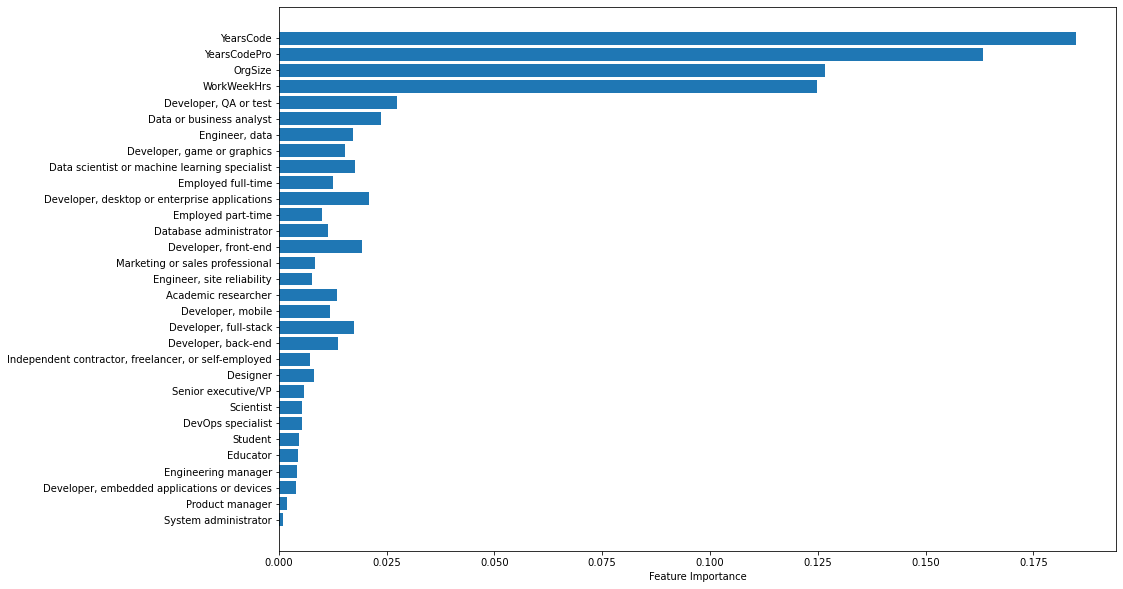

In [102]:
sorted_idx = dtree_19_feature_importance.argsort()
fig, ax = plt.subplots(figsize=(15, 10))
plt.barh(features[sorted_idx], dtree_19_feature_importance[sorted_idx])
plt.xlabel("Feature Importance")
plt.show()

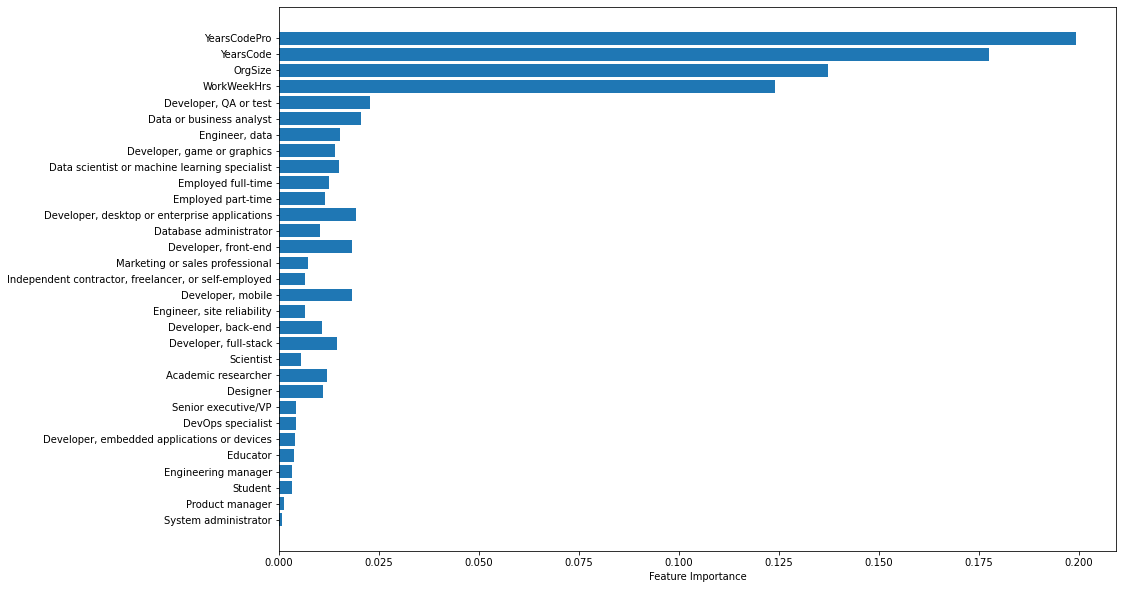

In [103]:
sorted_idx = dtree_20_feature_importance.argsort()
fig, ax = plt.subplots(figsize=(15, 10))
plt.barh(features[sorted_idx], dtree_20_feature_importance[sorted_idx])
plt.xlabel("Feature Importance")
plt.show()

In [104]:
rf_clf_20_feature_importance = rf_clf_20.feature_importances_
rf_clf_20_feature_importance

array([0.12613184, 0.18828434, 0.23912331, 0.23091212, 0.00234027,
       0.00165743, 0.00195368, 0.00463861, 0.00598767, 0.00395097,
       0.00674839, 0.00612906, 0.00753691, 0.00568491, 0.01324748,
       0.00946775, 0.00654559, 0.01191696, 0.01428955, 0.00450886,
       0.0087626 , 0.00441014, 0.00549175, 0.00379786, 0.00380286,
       0.00118778, 0.00410298, 0.00230575, 0.00147892, 0.00655088,
       0.00417923, 0.00542105, 0.00440027, 0.00858448, 0.00576491,
       0.00565755, 0.00866204, 0.00597798, 0.00762197, 0.0062461 ,
       0.00453717])

#### Most important factors related to job satisfaction are: working hours per week, years of coding, size of organization (or freelancer).

### 3. Tendencies and trends on IT developing market, most popular languages and platforms?

What languages, databases od frameworks are most popular in 2019 and 2020?

In [105]:
# potential columns for analysis
cols = ['LanguageWorkedWith',
'LanguageDesireNextYear',
'DatabaseWorkedWith',
'DatabaseDesireNextYear',
'PlatformWorkedWith',
'PlatformDesireNextYear',
'MiscTechWorkedWith',
'MiscTechDesireNextYear']

In [106]:
# make initial featureset
trends_19 = df_19[cols]
trends_20 = df_20[cols]

In [107]:
df_fullness(trends_19, cols)
df_fullness(trends_20, cols)

LanguageWorkedWith     98.52 %
LanguageDesireNextYear     94.61 %
DatabaseWorkedWith     85.50 %
DatabaseDesireNextYear     77.76 %
PlatformWorkedWith     90.79 %
PlatformDesireNextYear     87.13 %
MiscTechWorkedWith     67.03 %
MiscTechDesireNextYear     72.57 %
LanguageWorkedWith     89.01 %
LanguageDesireNextYear     83.94 %
DatabaseWorkedWith     76.83 %
DatabaseDesireNextYear     68.35 %
PlatformWorkedWith     83.52 %
PlatformDesireNextYear     78.50 %
MiscTechWorkedWith     62.52 %
MiscTechDesireNextYear     65.73 %


In [108]:
trends_19.dropna()
trends_19.shape

(88364, 8)

In [109]:
# trends and tendencies in programming languages
trends_19_lang = trends_19['LanguageWorkedWith'].str.split(';', expand=False)
trends_19_lang = trends_19_lang.explode('LanguageWorkedWith').value_counts()
trends_20_lang = trends_20['LanguageWorkedWith'].str.split(';', expand=False)
trends_20_lang = trends_20_lang.explode('LanguageWorkedWith').value_counts()

In [110]:
trends_19_lang = trends_19_lang/trends_19_lang.sum()*100
trends_20_lang = trends_20_lang/trends_20_lang.sum()*100
plot_data_1 = pd.DataFrame({'Languages': trends_19_lang.index, '2019': trends_19_lang.values})
plot_data_2 = pd.DataFrame({'Languages': trends_20_lang.index, '2020': trends_20_lang.values})
plot_data = pd.merge(plot_data_1, plot_data_2, how="outer", left_on='Languages', right_on='Languages')

In [111]:
plot_data = plot_data[:15]

In [112]:
plot_data

,Languages,2019,2020
0,JavaScript,13.441409,13.482089
1,HTML/CSS,12.589958,12.564265
2,SQL,10.789990,10.906957
3,Python,8.282915,8.785337
4,Java,8.151132,8.012414
5,Bash/Shell/PowerShell,7.262225,6.593009
6,C#,6.149036,6.262452
7,PHP,5.225413,5.207042
8,C++,4.663337,4.761540
9,TypeScript,4.199470,5.056916


<AxesSubplot:ylabel='Languages'>

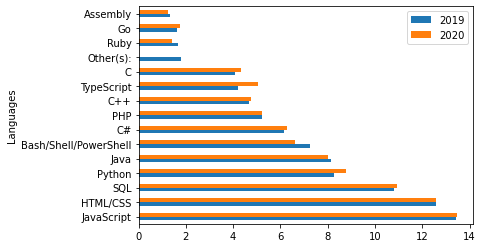

In [113]:
plot_data.plot.barh(x='Languages')

In [114]:
# trends and tendencies in databases
trends_19_db = trends_19['DatabaseWorkedWith'].str.split(';', expand=False)
trends_19_db = trends_19_db.explode('DatabaseWorkedWith').value_counts()
trends_20_db = trends_20['DatabaseWorkedWith'].str.split(';', expand=False)
trends_20_db = trends_20_db.explode('DatabaseWorkedWith').value_counts()

In [115]:
trends_19_db = trends_19_db/trends_19_db.sum()*100
trends_20_db = trends_20_db/trends_20_db.sum()*100
plot_data_1 = pd.DataFrame({'Databases': trends_19_db.index, '2019': trends_19_db.values})
plot_data_2 = pd.DataFrame({'Databases': trends_20_db.index, '2020': trends_20_db.values})
plot_data = pd.merge(plot_data_1, plot_data_2, how="outer", left_on='Databases', right_on='Databases')

In [116]:
plot_data = plot_data[:15]

<AxesSubplot:ylabel='Databases'>

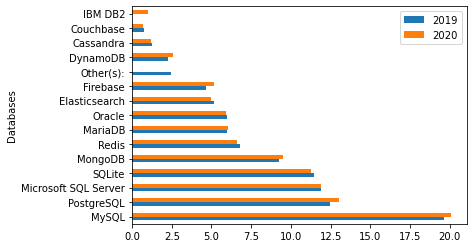

In [117]:
plot_data.plot.barh(x='Databases')

In [118]:
# trends and tendencies in platforms
trends_19_plt = trends_19['PlatformWorkedWith'].str.split(';', expand=False)
trends_19_plt = trends_19_plt.explode('PlatformWorkedWith').value_counts()
trends_20_plt = trends_20['PlatformWorkedWith'].str.split(';', expand=False)
trends_20_plt = trends_20_plt.explode('PlatformWorkedWith').value_counts()

In [119]:
trends_19_plt = trends_19_plt/trends_19_plt.sum()*100
trends_20_plt = trends_20_plt/trends_20_plt.sum()*100
plot_data_1 = pd.DataFrame({'Platforms': trends_19_plt.index, '2019': trends_19_plt.values})
plot_data_2 = pd.DataFrame({'Platforms': trends_20_plt.index, '2020': trends_20_plt.values})
plot_data = pd.merge(plot_data_1, plot_data_2, how="outer", left_on='Platforms', right_on='Platforms')

In [120]:
plot_data = plot_data[:15]

<AxesSubplot:ylabel='Platforms'>

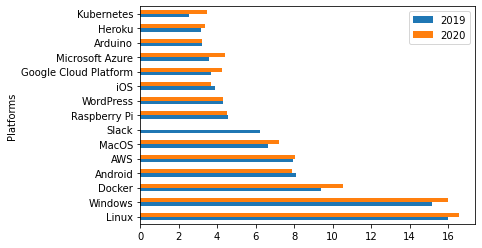

In [121]:
plot_data.plot.barh(x='Platforms')

In [122]:
# trends and tendencies in technologies
trends_19_tec = trends_19['MiscTechWorkedWith'].str.split(';', expand=False)
trends_19_tec = trends_19_tec.explode('MiscTechWorkedWith').value_counts()
trends_20_tec = trends_20['MiscTechWorkedWith'].str.split(';', expand=False)
trends_20_tec = trends_20_tec.explode('MiscTechWorkedWith').value_counts()

In [123]:
trends_19_tec = trends_19_tec/trends_19_tec.sum()*100
trends_20_tec = trends_20_tec/trends_20_tec.sum()*100
plot_data_1 = pd.DataFrame({'Technologies': trends_19_tec.index, '2019': trends_19_tec.values})
plot_data_2 = pd.DataFrame({'Technologies': trends_20_tec.index, '2020': trends_20_tec.values})
plot_data = pd.merge(plot_data_1, plot_data_2, how="outer", left_on='Technologies', right_on='Technologies')

In [124]:
plot_data = plot_data[:15]

<AxesSubplot:ylabel='Technologies'>

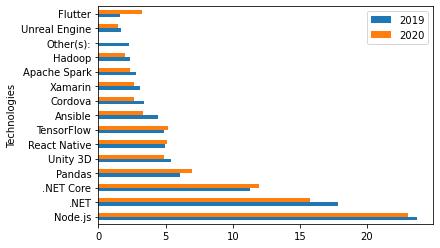

In [125]:
plot_data.plot.barh(x='Technologies')

### Conclusion
We can see that Java Script, Python and SQL are most popular programming languages. Also we highlight that Windows and linux are still popular but Android is popular too. When we are talking about databases - SQL databases are still the leaders of market, but NO SQL databasese improving their positions. Follow the Java Script, Node js technology is most popular.